# Linear Regression Analysis for Predicting Babies Brain Weight

### The project applies linear regression analysis to predict brain weight based on physiological characteristics such as `head size`, `gender`, and `age range`. The project aims to provide insights into how these factors correlate with brain weight and can be used in fields such as medical research, forensic science, and anthropometry.

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the Dataset:

In [88]:
df = pd.read_csv('headbrain_data.csv')
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


# Define Independent and Dependent Variables:

#### X (Independent Variables): Gender, Age Range, Head Size
#### Y (Dependent Variable): Brain Weight

In [89]:
# Independent variables = x
x = df[['Gender', 'Age Range', 'Head Size(cm^3)']]
x.head()

,Gender,Age Range,Head Size(cm^3)
0,1,1,4512
1,1,1,3738
2,1,1,4261
3,1,1,3777
4,1,1,4177


In [24]:
# Dependent variable = y
y = df['Brain Weight(grams)']
y.head()

0    1530
1    1297
2    1335
3    1282
4    1590
Name: Brain Weight(grams), dtype: int64

# Adding a Constant (Intercept):

In [90]:
# Add a constant (intercept) to the independent variables
x = sm.add_constant(x)

# Fit the Linear Regression Model using `statsmodels`:

In [91]:
# Create the model and fit it to the data
model = sm.OLS.from_formula('y ~ x', df)
results = model.fit()
print(results.params)

Intercept    232.281405
x[0]         232.281405
x[1]         -22.543254
x[2]         -23.968445
x[3]           0.244212
dtype: float64


#### Interpretation: 
#### Intercept (232.281405): predicted value of the `brain weight` (dependent variable) when all the independent variables (x) are zero.
#### -22.543254: This coefficient is associated with the second independent variable, which might be `Age Range`. A `negative` value suggests that an increase in this variable decreases the` brain weight` by about 22.54 grams.
#### -23.968445:  This coefficient corresponds to Head Size (cm³). A `negative` coefficient here means that as the `head size` increases, `brain weight` slightly decreases by about 23.97 grams per unit increase in head size
#### 0.244212: This coefficient might also be associated with `Gender` variable. A `positive` value of 0.24 suggests that the brain weight increases by about 0.24 grams for each one-unit increase in this variable

#### The intercept shows the baseline brain weight when all other variables are zero.
#### Positive coefficients indicate that the variable increases brain weight.
#### Negative coefficients suggest that the variable reduces brain weight.


# Making Predictions Based on the Existing Dataset:

In [100]:
predictions = results.predict(x)
# Display the first prediction
print(f"Predicted Brain Weight for the first entry: {predictions[0]:.2f} grams")

Predicted Brain Weight for the first entry: 1519.93 grams


# Evaluating the Model Performance:

### To evaluate how well the model performs on the dataset, check metrics like R-squared or use a test set for more robust evaluation.

In [101]:
# R-squared Value: Shows the proportion of variance explained by the model.
r_squared = results.rsquared
print(f"R-squared: {r_squared}")

R-squared: 0.6528346387526653


# Visualizing the Results:

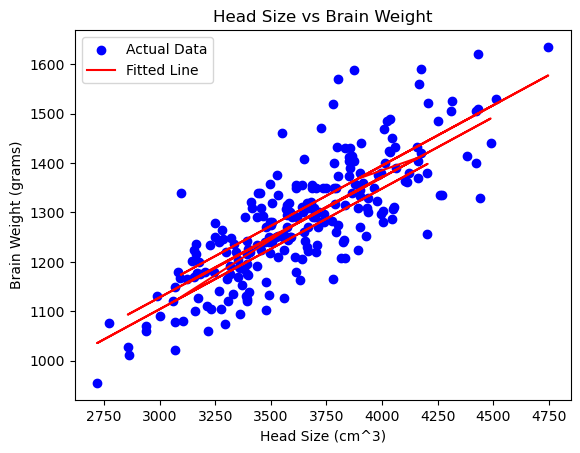

In [77]:
# Scatter plot between Head Size and Brain Weight
plt.scatter(df['Head Size(cm^3)'], df['Brain Weight(grams)'], color='blue', label='Actual Data')
plt.plot(df['Head Size(cm^3)'], results.fittedvalues, color='red', label='Fitted Line')
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.title('Head Size vs Brain Weight')
plt.legend()
plt.show()

### Key Insights:
### Positive Correlation: The fitted line slopes upward, suggesting a positive correlation between head size and brain weight. As head size increases, brain weight tends to increase as well.
### Spread of Data: While the data points cluster around the red fitted line, there is considerable spread, indicating some variability in brain weight that may not be fully explained by head size alone. This is common, as brain weight is likely influenced by other factors (e.g., gender, age, etc.).
### Model Fit: The relatively good alignment of the fitted line with the data suggests that the model captures the general trend in the relationship between head size and brain weight, though the scatter of points shows that the model does not perfectly explain all the variance in brain weight.